In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 데이터 셋 로드
df = pd.read_csv('creditcard.csv')

# 2. 특성과 레이블 분리
X = df.drop('Class', axis=1)
y = df['Class']

# 3. 데이터 분할 (학습 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 5. 모델 학습 - 랜덤 포레스트 분류기
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
# 6. 평가지표
y_pred = knn.predict(X_test_scaled)

print("정확도:",accuracy_score(y_test, y_pred))
print("평가지표")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

정확도: 0.9995435553526912
평가지표
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56857     7]
 [   19    79]]


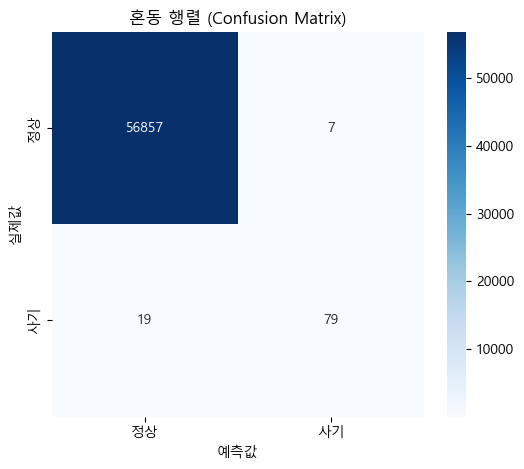

In [8]:
# 혼동 행렬 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['정상', '사기'], yticklabels=['정상', '사기'])
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('혼동 행렬 (Confusion Matrix)')
plt.show()